# Writing Reusable Code using Functions in Python

This notebook  take a practical and coding-focused approach. The best way to learn the material is to execute the code and experiment with it yourself.

This we are covers the following topics:

Creating and using functions in Python
Local variables, return values, and optional arguments
Reusing functions and using Python library functions
Exception handling using try-except blocks
Documenting functions using docstrings

## Creating and using functions
A function is a reusable set of instructions that takes one or more inputs, performs some operations, and often returns an output. Python contains many in-built functions like print, len, etc., and provides the ability to define new ones.

In [85]:
def say_hello(name):
    print('hello {}'.format(name))

In [86]:
say_hello('luis')

hello luis


In [87]:
say_hello('Odile')

hello Odile


Function arguments
Functions can accept zero or more values as inputs (also knows as arguments or parameters). Arguments help us write flexible functions that can perform the same operations on different values. Further, functions can return a result that can be stored in a variable or used in other expressions.

Here's a function that filters out the even numbers from a list and returns a new list using the return keyword.

In [88]:
def filter_even(number_list):
    result_list = []
    for number in number_list:
        if number %2 == 0:
            result_list.append(number)
    return result_list        
    

Can you understand what the function does by looking at the code? If not, try executing each line of the function's body separately within a code cell with an actual list of numbers in place of number_list.

In [89]:
even_list = filter_even([1,2,3,4,5,6,7])
even_list

[2, 4, 6]

In [90]:
def filter(number_list):
    list_result = []
    for num in number_list:
        if num %3 == 0:
            list_result.append(num)
    return list_result        
    



In [91]:
i_list = filter([1,3,6,7,8,9])
i_list

[3, 6, 9]

In [92]:
i_list = filter([11,12,13,14,15,16,17,18,19])
i_list

[12, 15, 18]

In [93]:
def filter_even(list_number):
    list_r = []
    for num in list_number:
        if num % 3 == 0 :
            list_r.append(num)
    return list_r        

In [94]:
e_list = filter_even([1,2,3,4,5,6,7,8,9])
e_list

[3, 6, 9]

### Writing great functions in Python¶
As a programmer, you will spend most of your time writing and using functions. Python offers many features to make your functions powerful and flexible. Let's explore some of these by solving a problem:

Radha is planning to buy a house that costs $1,260,000. She considering two options to finance her purchase:

Option 1: Make an immediate down payment of $300,000, and take loan 8-year loan with an interest rate of 10% (compounded monthly) for the remaining amount.
Option 2: Take a 10-year loan with an interest rate of 8% (compounded monthly) for the entire amount.
Both these loans have to be paid back in equal monthly installments (EMIs). Which loan has a lower EMI among the two?

Since we need to compare the EMIs for two loan options, defining a function to calculate the EMI for a loan would be a great idea. The inputs to the function would be cost of the house, the down payment, duration of the loan, rate of interest etc. We'll build this function step by step.

First, let's write a simple function that calculates the EMI on the entire cost of the house, assuming that the loan must be paid back in one year, and there is no interest or down payment.

In [95]:
def loan_emi(amount):
    emi = amount /12
    print('the EMI is: ${} '.format(emi))
    

In [96]:
loan_emi(1260000)

the EMI is: $105000.0 


In [97]:
# this example is using other number differet of the exercise
loan_emi(6369000)

the EMI is: $530750.0 


Local variables and scope¶
Let's add a second argument to account for the duration of the loan in months.

In [98]:
def loan_emi(amount, duration):
    emi = amount / duration
    print('the EMI is : ${}'.format(emi))

We can now compare a 8-year loan vs. a 10-year loan (assuming no down payment or interest).

In [99]:
loan_emi(1260000, 8*12)

the EMI is : $13125.0


In [100]:
loan_emi(1260000, 10*12)

the EMI is : $10500.0


Return values
As you might expect, the EMI for the 6-year loan is higher compared to the 10-year loan. Right now, we're printing out the result. It would be better to return it and store the results in variables for easier comparison. We can do this using the return statement

In [101]:
def loan_emi(amount, duration):
    emi = amount/duration
    return emi

In [102]:
emi1  = loan_emi(1260000, 8*12)


In [103]:
emi2 = loan_emi(1260000, 10*12)

In [104]:
emi1

13125.0

In [105]:
emi2

10500.0

Optional arguments
Next, let's add another argument to account for the immediate down payment. We'll make this an optional argument with a default value of 0.

In [106]:
def loan_emi(amount, duration, down_payment=0):
    loan_amount = amount - down_payment
    emi = loan_amount / duration
    return emi



In [107]:
emi1 = loan_emi(1260000, 8*12, 3e5)
emi1

10000.0

In [108]:
emi2 = loan_emi(1260000, 10*12)
emi2

10500.0

Next, let's add the interest calculation into the function. Here's the formula used to calculate the EMI for a loan:
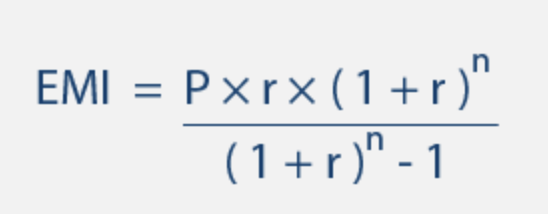

where:

P is the loan amount (principal)
n is the no. of months
r is the rate of interest per month





In [109]:
def loan_emi(amount, duration, rate, down_payment=0):
    loan_amount = amount - down_payment
    emi = loan_amount * rate *((1+rate)**duration)/(((1+rate)**duration)-1)
    return emi

Note that while defining the function, required arguments like cost, duration and rate must appear before optional arguments like down_payment.

Let's calculate the EMI for Option 1

In [110]:
loan_emi(1260000, 8*12, 0.1/12, 3e5)

14567.19753389219

While calculating the EMI for Option 2, we need not include the down_payment argument.

In [111]:
loan_emi(1260000, 10*12, 0.08/12)

15287.276888775077

Named arguments
Invoking a function with many arguments can often get confusing and is prone to human errors. Python provides the option of invoking functions with named arguments for better clarity. You can also split function invocation into multiple lines.

In [112]:
emi1 = loan_emi(
    amount= 1260000,
    duration= 8*12,
    rate= 0.1/12,
    down_payment= 3e5
)

In [113]:
emi1

14567.19753389219

In [114]:
emi2 = loan_emi(
    amount= 1260000,
    duration= 10*12,
    rate= 0.8/12
)

In [115]:
emi2

84036.39322752036

Modules and library functions
We can already see that the EMI for Option 1 is lower than the EMI for Option 2. However, it would be nice to round up the amount to full dollars, rather than showing digits after the decimal. To achieve this, we might want to write a function that can take a number and round it up to the next integer (e.g., 1.2 is rounded up to 2). That would be a great exercise to try out!

Modules: Modules are files containing Python code (variables, functions, classes, etc.). They provide a way of organizing the code for large Python projects into files and folders. The key benefit of using modules is namespaces: you must import the module to use its functions within a Python script or notebook. Namespaces provide encapsulation and avoid naming conflicts between your code and a module or across modules.

We can use the ceil function (short for ceiling) from the math module to round up numbers. Let's import the module and use it to round up the number 1.2.

In [116]:
import math

In [117]:
help(math.ceil)

Help on built-in function ceil in module math:

ceil(x, /)
    Return the ceiling of x as an Integral.
    
    This is the smallest integer >= x.



In [118]:
math.ceil(1.2)

2

In [119]:
def loan_emi(amount, duration, rate, down_payment=0 ):
    loan_amount = amount - down_payment
    emi = loan_amount * rate * ((1+rate)**duration) / (((1+rate)**duration)-1)
    emi = math.ceil(emi)
    return emi

In [120]:
emi1 = loan_emi(
    amount= 1260000, 
    duration= 8*12,
    rate= 0.1/12,
    down_payment= 3e5
)

In [121]:
emi1

14568

In [122]:
emi2 = loan_emi(
    amount= 1260000,
    duration= 10*12,
    rate= 0.08/12
)

In [123]:
emi2

15288

Let's compare the EMIs and display a message for the option with the lower EMI.

In [124]:
if emi1 < emi2:
    print("Option 1 has the lower EMI: ${}".format(emi1))
else:
    print("Option 2 has the lower EMI: ${}".format(emi2))

Option 1 has the lower EMI: $14568


Reusing and improving functions
Now we know for sure that "Option 1" has the lower EMI among the two options. But what's even better is that we now have a handy function loan_emi that we can use to solve many other similar problems with just a few lines of code. Let's try it with a couple more questions.

Shaun is currently paying back a home loan for a house he bought a few years ago. The cost of the house was $800,000. Shaun made a down payment of 25% of the price. He financed the remaining amount using a 6-year loan with an interest rate of 7% per annum (compounded monthly). 
Shaun is now buying a car worth $60,000, which he is planning to finance using a 1-year loan with an interest rate of 12% per annum. Both loans are paid back in EMIs. What is the total monthly payment Shaun makes towards loan repayment?

In [125]:
cost_house = 800000
home_loan_duration = 6*12 #months
home_loan_rate = 0.07/12# month
home_down_payment = .25 *800000

emi_house = loan_emi(amount= cost_house,
                     duration= home_loan_duration,
                     rate= home_loan_rate,
                     down_payment=home_down_payment)
                     
emi_house                  


10230

In [126]:
cost_of_car = 60000
car_loan_duration = 1*12 # months
car_loan_rate = .12/12 # monthly

emi_car = loan_emi(amount=cost_of_car, 
                   duration=car_loan_duration, 
                   rate=car_loan_rate)

emi_car

5331

In [127]:
print('Shaun makes total montly payment of ${} toawrds loan repayment,'.format(emi_house + emi_car))

Shaun makes total montly payment of $15561 toawrds loan repayment,


Exceptions and try-except¶
Q: If you borrow $100,000 using a 10-year loan with an interest rate of 9% per annum, what is the total amount you end up paying as interest?

One way to solve this problem is to compare the EMIs for two loans: one with the given rate of interest and another with a 0% rate of interest. The total interest paid is then simply the sum of monthly differences over the duration of the loan.

In [128]:
emil_whith_interet= loan_emi(amount=100000, duration=10*12, rate=0.09/12)
emil_whith_interet

1267

In [129]:
def loan_emi(amount, duration, rate, down_payment=0):
    loan_amount = amount - down_payment
    try:
        emi = loan_amount * rate * ((1+rate)**duration) / (((1+rate)**duration)-1)
    except ZeroDivisionError:
        emi= loan_amount/duration
    emi= math.ceil(emi)
    return emi        
''' ZeroDivisionError                         Traceback (most recent call last)
<ipython-input-45-b684ffbee02d> in <module>
----> 1 emi_without_interest = loan_emi(amount=100000, duration=10*12, rate=0./12)
      2 emi_without_interest

<ipython-input-35-ad16168becb0> in loan_emi(amount, duration, rate, down_payment)
      1 def loan_emi(amount, duration, rate, down_payment=0):
      2     loan_amount = amount - down_payment
----> 3     emi = loan_amount * rate * ((1+rate)**duration) / (((1+rate)**duration)-1)
      4     emi = math.ceil(emi)
      5     return emi

ZeroDivisionError: float division by zero
You can use the try and except statements to handle an exception '''
 



' ZeroDivisionError                         Traceback (most recent call last)\n<ipython-input-45-b684ffbee02d> in <module>\n----> 1 emi_without_interest = loan_emi(amount=100000, duration=10*12, rate=0./12)\n      2 emi_without_interest\n\n<ipython-input-35-ad16168becb0> in loan_emi(amount, duration, rate, down_payment)\n      1 def loan_emi(amount, duration, rate, down_payment=0):\n      2     loan_amount = amount - down_payment\n----> 3     emi = loan_amount * rate * ((1+rate)**duration) / (((1+rate)**duration)-1)\n      4     emi = math.ceil(emi)\n      5     return emi\n\nZeroDivisionError: float division by zero\nYou can use the try and except statements to handle an exception '

If you borrow $100,000 using a 10-year loan with an interest rate of 9% per annum, what is the total amount you end up paying as interest?

In [130]:
emi_with_interest = loan_emi(amount=100000, duration=10*12, rate=0.09/12)
emi_with_interest

1267

In [131]:
emi_without_interest = loan_emi(amount=100000, duration=10*12, rate=0)
emi_without_interest

834

In [132]:
total_interest = (emi_with_interest - emi_without_interest) * 10*12

In [133]:
print("The total interest paid is ${}.".format(total_interest))

The total interest paid is $51960.


In [134]:
help(loan_emi)

Help on function loan_emi in module __main__:

loan_emi(amount, duration, rate, down_payment=0)



Other example of funtion

How much is Luis paid if he works 45 hours a week at x company, and his hourly wage is a rate of 10.50?

In [135]:
def compupay(hrs, r):
    agreg = hrs* r
    return agreg

hrs = 45
r = 10.5
hweek = 40 
normal_w= hweek* r
extra_hour = r * 1.5
h_extra  =  hrs - 40 
extra_w = h_extra * extra_hour

def salaryplus (normal_w, extra_w):
    real_salary = normal_w + extra_w
    return real_salary

if hrs > 40:
    x = salaryplus (normal_w, extra_w)
    print('your pay is: ', x)
else:
    y = compupay (hrs, r)
    print('Your pay is: ' , y)       

your pay is:  498.75
